# Project Introduction

This project analyzes customer complaints about various financial products and services. These are reported to the Consumer Financial Protection Bureau (CFPB). In every week, the Bureau collects thousands of submitted customer complaints and forwards them to the respective companies for response. Once a company responds, immediately or after 15 days, complaints are published publicly, providing a transparent view of customer experiences in the financial space. By examining the dataset, we gather insights into customer grievances, customer responsiveness and underlying patterns/trends in the quality of products in the financial sector.


## Problem Context

Customers have challenges navigating the financial sector and their associated products. Many are met with barriers, such a lack of accepted IDs to open a new bank or fintech account. Others suffer from a lack of access to certain financial products due to geographical locations. Financial companies on the other hand provide a lack of clear communication relating to hidden fees, for example, with opening new accounts or credit cards. This makes customers lose trust in them, leading to unexpected situations and recurring problems and eventually frustration.

Analyzing customer complaints allows companies to address recurring problems in a timely manner. It assists them in streamlining their service rendering process to best assist customer needs, allowing customers to benefit from the transparency and awareness associated with it.


## Research Questions

1. Which financial products generate the most consumer complaints?  
2. What are the most common issues reported by consumers?  
3. How responsive are companies in addressing complaints, and what is the distribution of response times?  
4. Are there noticeable trends in complaints over time or by geographic location?  
5. Which companies resolve complaints satisfactorily on a consistent basis, and which struggle?  
6. Can patterns in the complaints provide insights into systemic issues in the financial sector?  


## Project Objectives

1. Provide a clear overview of the types and how frequent these complaints occur.  
2. Idenfity companies and/or product categories receiving the most complaints.  
3. Analyze response times and resolutions to assess company responsiveness.  
4. Identify trends over time or across regions that could guide consumer awareness or policy decisions.


## Dataset 

The dataset is derived directly from the CFPB official consumer complaint database. The CFPB aggregates complaints submitted by consumers across the United States in a JSON or CSV file. Complaints, regarding financial products such as credit cards, mortgages, bank accounts, and debt collection are included. The dataset also includes details such as complaint date, product type, issue, company response, and consumer demographics where available


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import dataset
df1=pd.read_csv('consumer_complaints.csv', low_memory=False)
df1

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [4]:
# Derive column information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

# Data Cleaning and Initial Data Analysis

## Standardize column headers

In [53]:
df1.columns=df1.columns.str.title()
df1

,Date_Received,Product,Sub_Product,Issue,Company,State,Zipcode,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,NaN,Referral,2014-07-23,Closed with explanation,No,No,918447
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Global Recovery Group,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963


## Changing Data types

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date_Received                 555957 non-null  object
 1   Product                       555957 non-null  object
 2   Sub_Product                   397635 non-null  object
 3   Issue                         555957 non-null  object
 4   Sub_Issue                     212622 non-null  object
 5   Consumer_Complaint_Narrative  66806 non-null   object
 6   Company_Public_Response       85124 non-null   object
 7   Company                       555957 non-null  object
 8   State                         551070 non-null  object
 9   Zipcode                       551452 non-null  object
 10  Tags                          77959 non-null   object
 11  Consumer_Consent_Provided     123458 non-null  object
 12  Submitted_Via                 555957 non-null  object
 13 

In [9]:
# Change date columns to time-series data type
df1['Date_Received']=pd.to_datetime(df1['Date_Received'])
df1['Date_Sent_To_Company']=pd.to_datetime(df1['Date_Sent_To_Company'])

In [10]:
# Check to confirm change
df1['Date_Sent_To_Company'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 555957 entries, 0 to 555956
Series name: Date_Sent_To_Company
Non-Null Count   Dtype         
--------------   -----         
555957 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


In [11]:
# Check to confirm change
df1['Date_Received'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 555957 entries, 0 to 555956
Series name: Date_Received
Non-Null Count   Dtype         
--------------   -----         
555957 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


## Missing values

In [12]:
#Scan whole dataset for missing values; missing values return a True boolean value
df1.isna()

,Date_Received,Product,Sub_Product,Issue,Sub_Issue,Consumer_Complaint_Narrative,Company_Public_Response,Company,State,Zipcode,Tags,Consumer_Consent_Provided,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
0,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
2,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,False,False,False,False,True,True,True,False,True,True,True,True,False,False,False,False,False,False
555953,False,False,False,False,True,True,True,False,True,True,False,True,False,False,False,False,False,False
555954,False,False,False,False,True,True,True,False,True,True,True,True,False,False,False,False,False,False
555955,False,False,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,False


In [13]:
# Determine the total number of missing values in each column
df1.isna().sum()

Date_Received                        0
Product                              0
Sub_Product                     158322
Issue                                0
Sub_Issue                       343335
Consumer_Complaint_Narrative    489151
Company_Public_Response         470833
Company                              0
State                             4887
Zipcode                           4505
Tags                            477998
Consumer_Consent_Provided       432499
Submitted_Via                        0
Date_Sent_To_Company                 0
Company_Response_To_Consumer         0
Timely_Response                      0
Consumer_Disputed?                   0
Complaint_Id                         0
dtype: int64

In [14]:
# Calculate the percentage of missing values in identified columns
df1['Sub_Product'].isna().mean()*100

np.float64(28.47738224359078)

Percentage <30%. Not enough to drop column

In [15]:
df1['Sub_Issue'].isna().mean()*100

np.float64(61.755675348992824)

Percentage >50%. Consider dropping column

In [16]:
df1['Consumer_Complaint_Narrative'].isna().mean()*100

np.float64(87.9836030484372)

Column must be dropped. Too many missing values

In [24]:
df1=df1.drop(['Consumer_Complaint_Narrative'], axis=1)
df1

,Date_Received,Product,Sub_Product,Issue,Sub_Issue,Company_Public_Response,Company,State,Zipcode,Tags,Consumer_Consent_Provided,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,2014-07-23,Closed with explanation,No,No,918447
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963


In [25]:
# Check to see if dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_Received                 555957 non-null  datetime64[ns]
 1   Product                       555957 non-null  object        
 2   Sub_Product                   397635 non-null  object        
 3   Issue                         555957 non-null  object        
 4   Sub_Issue                     212622 non-null  object        
 5   Company_Public_Response       85124 non-null   object        
 6   Company                       555957 non-null  object        
 7   State                         551070 non-null  object        
 8   Zipcode                       551452 non-null  object        
 9   Tags                          77959 non-null   object        
 10  Consumer_Consent_Provided     123458 non-null  object        
 11  Submitted_Via

Column count reduced to 16. Consumer_Complaint_Narrative removed

In [18]:
# Comparing Issue and Sub Issue columns to decipher correlation
df1[['Issue', 'Sub_Issue']].head(50)

,Issue,Sub_Issue
0,"Loan modification,collection,foreclosure",NaN
1,"Loan servicing, payments, escrow account",NaN
2,Incorrect information on credit report,Account status
3,Repaying your loan,Repaying your loan
4,False statements or representation,Attempted to collect wrong amount
5,Application processing delay,NaN
6,Credit line increase/decrease,NaN
7,Deposits and withdrawals,NaN
8,Deposits and withdrawals,NaN
9,"Loan modification,collection,foreclosure",NaN


Sub-Issue is a sub-category to Issue and contains too many missing values. Does not impact data directly. Safe to drop

In [19]:
df1['Company_Public_Response'].isna().mean()*100

np.float64(84.688743913648)

Getting dropped!

In [32]:
# Drop Sub-issue, Company public response column
df1=df1.drop(['Sub_Issue'],axis=1)
df1

,Date_Received,Product,Sub_Product,Issue,Company_Public_Response,Company,State,Zipcode,Tags,Consumer_Consent_Provided,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,2013-08-30,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,2014-07-23,Closed with explanation,No,No,918447
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550
555955,2015-04-14,Debt collection,I do not know,Communication tactics,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963


In [33]:
df1=df1.drop(['Company_Public_Response'],axis=1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_Received                 555957 non-null  datetime64[ns]
 1   Product                       555957 non-null  object        
 2   Sub_Product                   397635 non-null  object        
 3   Issue                         555957 non-null  object        
 4   Company                       555957 non-null  object        
 5   State                         551070 non-null  object        
 6   Zipcode                       551452 non-null  object        
 7   Tags                          77959 non-null   object        
 8   Consumer_Consent_Provided     123458 non-null  object        
 9   Submitted_Via                 555957 non-null  object        
 10  Date_Sent_To_Company          555957 non-null  datetime64[ns]
 11  Company_Respo

Column count reduced from 16 to 14

In [26]:
df1['Tags'].isna().mean()*100

np.float64(85.97751264935958)

In [35]:
df1=df1.drop(['Tags'],axis=1)

In [28]:
df1['Consumer_Consent_Provided'].isna().mean()*100

np.float64(77.79360634005867)

In [38]:
df1=df1.drop(['Consumer_Consent_Provided'], axis=1)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_Received                 555957 non-null  datetime64[ns]
 1   Product                       555957 non-null  object        
 2   Sub_Product                   397635 non-null  object        
 3   Issue                         555957 non-null  object        
 4   Company                       555957 non-null  object        
 5   State                         551070 non-null  object        
 6   Zipcode                       551452 non-null  object        
 7   Submitted_Via                 555957 non-null  object        
 8   Date_Sent_To_Company          555957 non-null  datetime64[ns]
 9   Company_Response_To_Consumer  555957 non-null  object        
 10  Timely_Response               555957 non-null  object        
 11  Consumer_Disp

In [40]:
# Missing values left
df1.isna().sum()

Date_Received                        0
Product                              0
Sub_Product                     158322
Issue                                0
Company                              0
State                             4887
Zipcode                           4505
Submitted_Via                        0
Date_Sent_To_Company                 0
Company_Response_To_Consumer         0
Timely_Response                      0
Consumer_Disputed?                   0
Complaint_Id                         0
dtype: int64

In [41]:
# Determine items in sub-product to consider removal
df1['Sub_Product'].value_counts()

Sub_Product
Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                          44369
Other (i.e. phone, health club, etc.)     29617
I do not know                             21634
Conventional adjustable mortgage (ARM)    20941
Credit card                               20825
FHA mortgage                              19152
Non-federal student loan                  17969
Medical                                   13297
Vehicle loan                              12168
Other bank product/service                10895
Payday loan                                9684
Home equity loan or line of credit         8944
Installment loan                           5279
Savings account                            3996
VA mortgage                                3735
Mortgage                                   3433
(CD) Certificate of deposit                2839
Auto                                       2523
International money transfer

Column has several unique values; cannot back or forward fill

In [44]:
# Locate where the missing values in the State column are to discover trends to facilitate IDA
state_missing=df1.loc[df1['State'].isna()]
state_missing

,Date_Received,Product,Sub_Product,Issue,Company,State,Zipcode,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
365,2013-09-10,Money transfers,International money transfer,Money was not available when promised,TD Bank US Holding Company,NaN,NaN,Web,2013-09-10,Closed with explanation,Yes,Yes,521653
868,2013-09-10,Money transfers,Domestic (US) money transfer,Other transaction issues,HSBC North America Holdings Inc.,NaN,NaN,Web,2013-09-11,Closed with explanation,Yes,No,522003
939,2013-09-25,Bank account or service,Checking account,Deposits and withdrawals,New York Community Bank,NaN,NaN,Phone,2013-09-25,Closed with explanation,Yes,No,541527
1026,2013-09-02,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Ditech Financial LLC,NaN,NaN,Web,2013-09-03,Closed with explanation,Yes,No,514861
2043,2013-09-03,Bank account or service,Checking account,"Account opening, closing, or management",Citibank,NaN,NaN,Referral,2013-09-06,Closed with monetary relief,Yes,No,513291
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,NaN,Referral,2014-07-23,Closed with explanation,No,No,918447
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Global Recovery Group,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963


In [46]:
# Determine the percentage of missing values in State column
df1['State'].isna().mean()*100

np.float64(0.8790248166674761)

Keep State Column

## Missing Values: Justification

1. Collectors may not be able to collect certain personal information
2. There were columns (Sub-Issue) that depended on others (Issue). Sub_Issue was removed due to a high count of missing values
3. Forms filled to generate dataset were not thoroughly filled

Values in columns had to be dropped for the following reasons:
1. To avoid visualisations that could be misleading
2. To avoid a bias in statistical calculations of the mean, median, etc.
3. Columns which had several missing values would not qualify as features during model training

## Duplicates

In [47]:
# Check for duplicates
df1.duplicated().any()

np.False_

In [48]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555952    False
555953    False
555954    False
555955    False
555956    False
Length: 555957, dtype: bool

In [49]:
df1.duplicated().sum()

np.int64(0)

#### No duplicates found

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date_Received                 555957 non-null  datetime64[ns]
 1   Product                       555957 non-null  object        
 2   Sub_Product                   397635 non-null  object        
 3   Issue                         555957 non-null  object        
 4   Company                       555957 non-null  object        
 5   State                         551070 non-null  object        
 6   Zipcode                       551452 non-null  object        
 7   Submitted_Via                 555957 non-null  object        
 8   Date_Sent_To_Company          555957 non-null  datetime64[ns]
 9   Company_Response_To_Consumer  555957 non-null  object        
 10  Timely_Response               555957 non-null  object        
 11  Consumer_Disp

# Exploratory Data Analysis

In [62]:
df1

,Date_Received,Product,Sub_Product,Issue,Company,State,Zipcode,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,NaN,Referral,2014-07-23,Closed with explanation,No,No,918447
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Global Recovery Group,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963


In [51]:
df1.describe()

,Date_Received,Date_Sent_To_Company,Complaint_Id
count,555957,555957,5.559570e+05
mean,2014-06-28 00:45:51.648778496,2014-07-02 16:32:26.170657280,9.600510e+05
min,2011-12-01 00:00:00,2011-12-01 00:00:00,1.000000e+00
25%,2013-08-09 00:00:00,2013-08-19 00:00:00,4.863230e+05
50%,2014-08-07 00:00:00,2014-08-12 00:00:00,9.737830e+05
75%,2015-06-28 00:00:00,2015-07-01 00:00:00,1.441702e+06
max,2016-04-25 00:00:00,2016-04-25 00:00:00,1.895894e+06
std,NaN,NaN,5.504296e+05


1. Which financial products generate the most consumer complaints?

In [65]:
fin_prod_comp=df1.groupby('Product')['Issue'].value_counts()
fin_prod_comp

Product                  Issue                                   
Bank account or service  Account opening, closing, or management     26661
                         Deposits and withdrawals                    17195
                         Problems caused by my funds being low        9037
                         Making/receiving payments, sending money     5350
                         Using a debit or ATM card                    4320
                                                                     ...  
Student loan             Dealing with my lender or servicer           5904
                         Can't repay my loan                          3920
                         Repaying your loan                           3832
                         Problems when you are unable to pay          1701
                         Getting a loan                                482
Name: count, Length: 108, dtype: int64

In [66]:
fin_prod_subcomp=df1.groupby('Sub_Product')['Issue'].value_counts()
fin_prod_subcomp

Sub_Product                  Issue                                   
(CD) Certificate of deposit  Account opening, closing, or management     2057
                             Deposits and withdrawals                     646
                             Making/receiving payments, sending money     113
                             Problems caused by my funds being low         17
                             Using a debit or ATM card                      6
                                                                         ... 
Vehicle lease                Shopping for a loan or lease                 117
Vehicle loan                 Managing the loan or lease                  6490
                             Problems when you are unable to pay         3191
                             Taking out the loan or lease                1660
                             Shopping for a loan or lease                 827
Name: count, Length: 289, dtype: int64

Text(0.5, 0, 'Consumer Complaints')

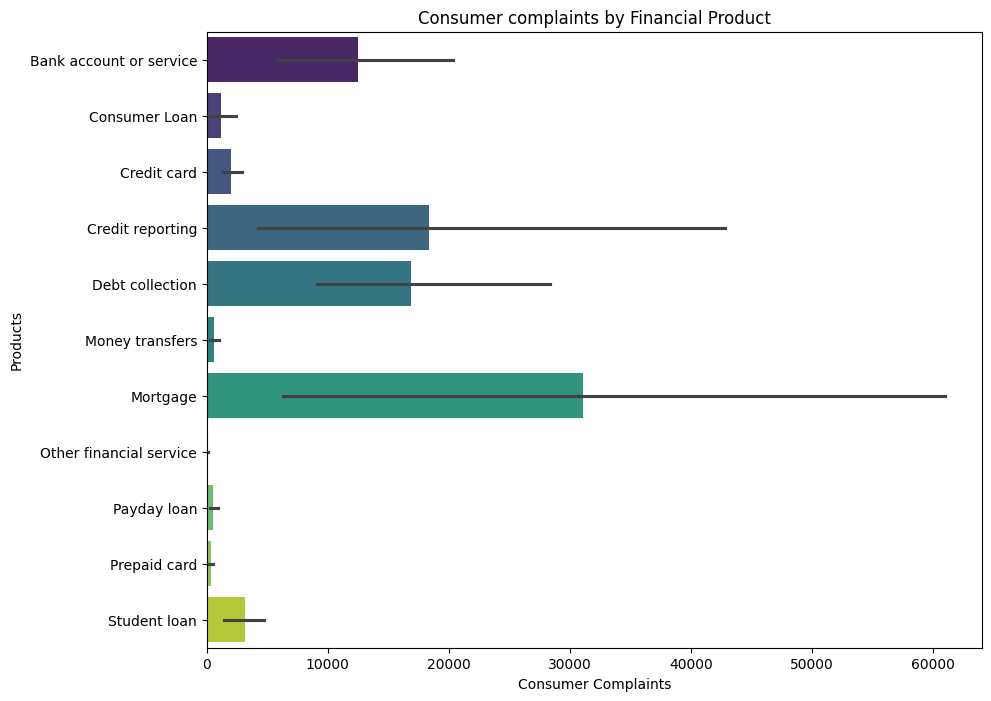

In [91]:
# Convert series to DataFrame
fin_prod_df = fin_prod_comp.reset_index(name='Count')
plt.figure(figsize=(10,8))
sns.barplot(data=fin_prod_df, y='Product', x='Count', palette='viridis', hue='Product', legend=False)
plt.title('Consumer complaints by Financial Product')
plt.ylabel('Products')
plt.xlabel('Consumer Complaints')

2. What are the most common issues reported by consumers?

In [94]:
# Highlight the top ten common issues
df1['Issue'].value_counts().head(10)

Issue
Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
Communication tactics                       18293
Disclosure verification of debt             18292
Deposits and withdrawals                    17195
Application, originator, mortgage broker    13306
Billing disputes                            11042
Name: count, dtype: int64

In [165]:
# Top 5 on a pie chart
comm_issue=df1['Issue'].value_counts().head(5)
comm_issue

Issue
Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
Name: count, dtype: int64

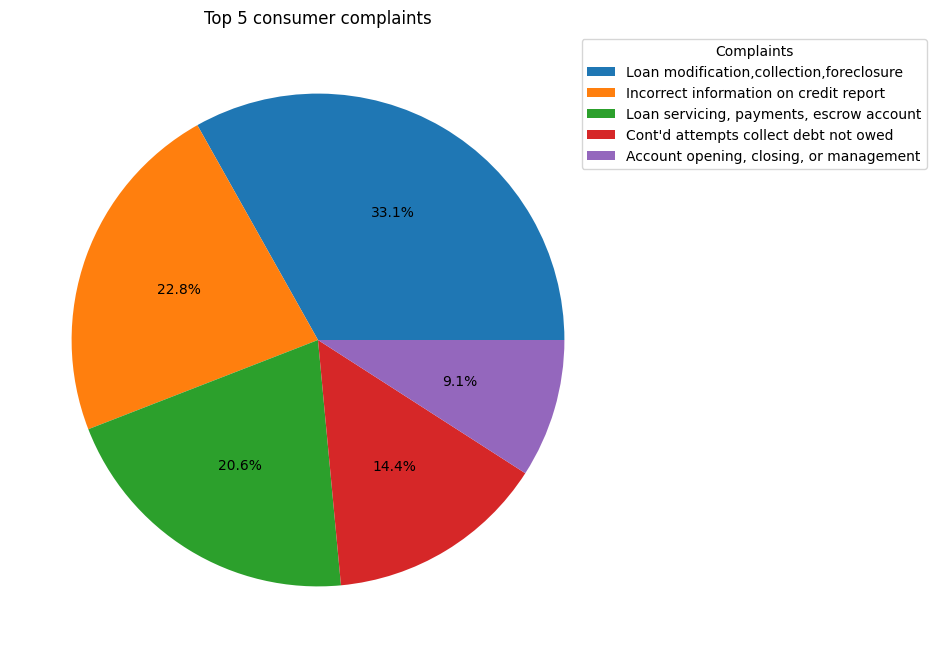

In [166]:
# Draw pie chart
plt.figure(figsize=(10,8))
plt.pie(comm_issue, autopct='%1.1f%%')
plt.title('Top 5 consumer complaints')
plt.legend(title='Complaints', labels=comm_issue.index, bbox_to_anchor=(1, 0, 0.5, 1), loc='upper right')


3. How responsive are companies in addressing complaints, and what is the distribution of response times?

In [103]:
# General timely responses (counts)
df1['Timely_Response'].value_counts()

Timely_Response
Yes    541909
No      14048
Name: count, dtype: int64

In [105]:
df1['Company'].value_counts()

Company
Bank of America                55998
Wells Fargo & Company          42024
JPMorgan Chase & Co.           33881
Equifax                        31828
Experian                       30905
                               ...  
Nations Trust Mortgage Corp        1
Alliance Capital Corp.             1
Tsarouhis Law Group, LLC           1
AAA COLLECTORS, INC.               1
Turbo Cash, LLC                    1
Name: count, Length: 3605, dtype: int64

In [104]:
# For each company, group responses
df1.groupby('Company')['Timely_Response'].value_counts().sort_values(ascending=False)

Company                          Timely_Response
Bank of America                  Yes                54446
Wells Fargo & Company            Yes                41651
JPMorgan Chase & Co.             Yes                33798
Equifax                          Yes                31828
Experian                         Yes                30899
                                                    ...  
Works & Lentz, Inc               No                     1
1st Capital Mortgage, LLC        Yes                    1
World-Wide Communication Center  Yes                    1
World Wide Pay Day Advance, Inc  No                     1
World Wide Land Transfer, Inc.   Yes                    1
Name: count, Length: 5254, dtype: int64

In [160]:
top_20_timely=df1.groupby('Company')['Timely_Response'].value_counts().sort_values(ascending=False).head(10)
top_20_timely

Company                                 Timely_Response
Bank of America                         Yes                54446
Wells Fargo & Company                   Yes                41651
JPMorgan Chase & Co.                    Yes                33798
Equifax                                 Yes                31828
Experian                                Yes                30899
TransUnion Intermediate Holdings, Inc.  Yes                25534
Citibank                                Yes                25226
Ocwen                                   Yes                20439
Capital One                             Yes                15569
Nationstar Mortgage                     Yes                13125
Name: count, dtype: int64

In [161]:
# Distribution of response times in days
df1['time_response'].describe()

count    555957.000000
mean          4.657344
std          17.200280
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: time_response, dtype: float64

Most companies have a timely response time

In [162]:
# Calculate average response time
avg_response=df1['Date_Received'].mean()
print('The average response time is', avg_response)

The average response time is 2014-06-28 00:45:51.648778496


In [163]:
# Time series chart to visualize the trend of responses within a period of time

4. Are there noticeable trends in complaints over time or by geographic location?

In [164]:
df1

,Date_Received,Product,Sub_Product,Issue,Company,State,Zipcode,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,...,340,601,714,541,352,832,711,481,496,time_response
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,...,340,601,714,541,352,832,711,481,496,4
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,...,340,601,714,541,352,832,711,481,496,4
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,2013-09-18,Closed with explanation,...,340,601,714,541,352,832,711,481,496,19
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,...,340,601,714,541,352,832,711,481,496,0
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,...,340,601,714,541,352,832,711,481,496,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Referral,2014-07-07,Closed with explanation,...,340,601,714,541,352,832,711,481,496,6
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,NaN,Referral,2014-07-23,Closed with explanation,...,340,601,714,541,352,832,711,481,496,22
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,NaN,Phone,2013-11-18,Closed with explanation,...,340,601,714,541,352,832,711,481,496,496
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Global Recovery Group,NaN,NaN,Phone,2015-04-14,Untimely response,...,340,601,714,541,352,832,711,481,496,0


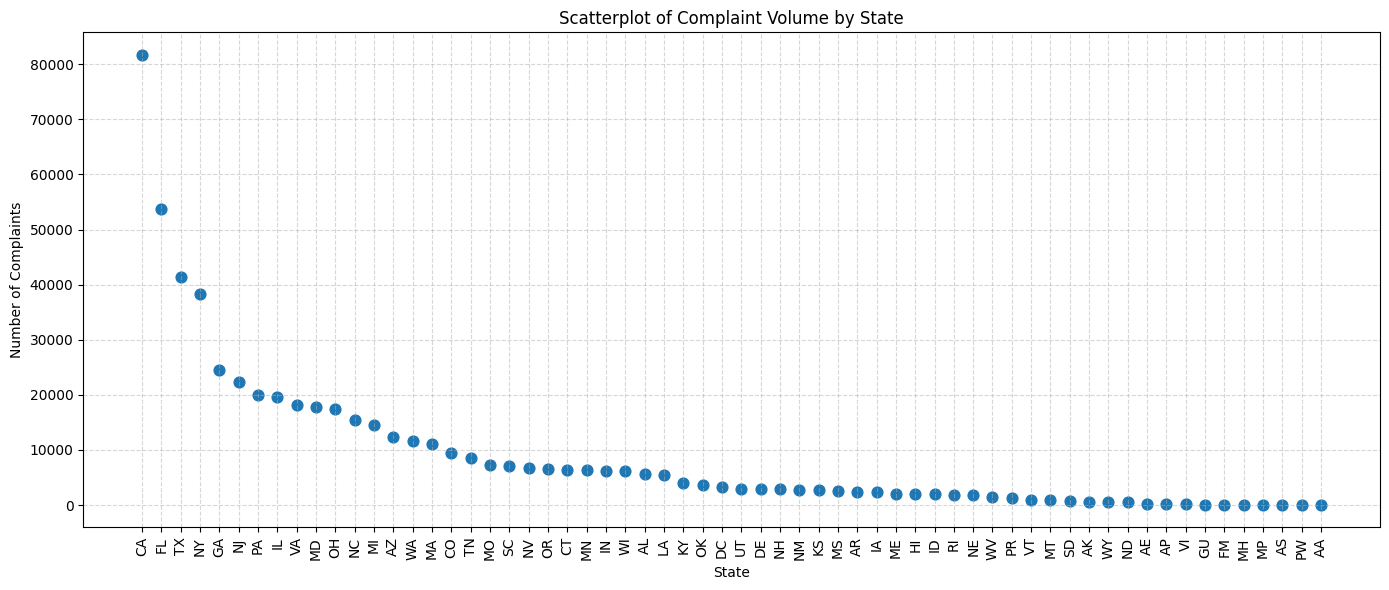

In [169]:
state_counts = df1['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Complaint_Count']


# Change state name to numerical positions
state_counts['State_Index'] = np.arange(len(state_counts))

# Plot scatterplot
plt.figure(figsize=(14, 6))
plt.scatter(state_counts['State_Index'], state_counts['Complaint_Count'], s=60)
plt.xticks(state_counts['State_Index'], state_counts['State'], rotation=90)
plt.title('Scatterplot of Complaint Volume by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


California has the most number of complaints

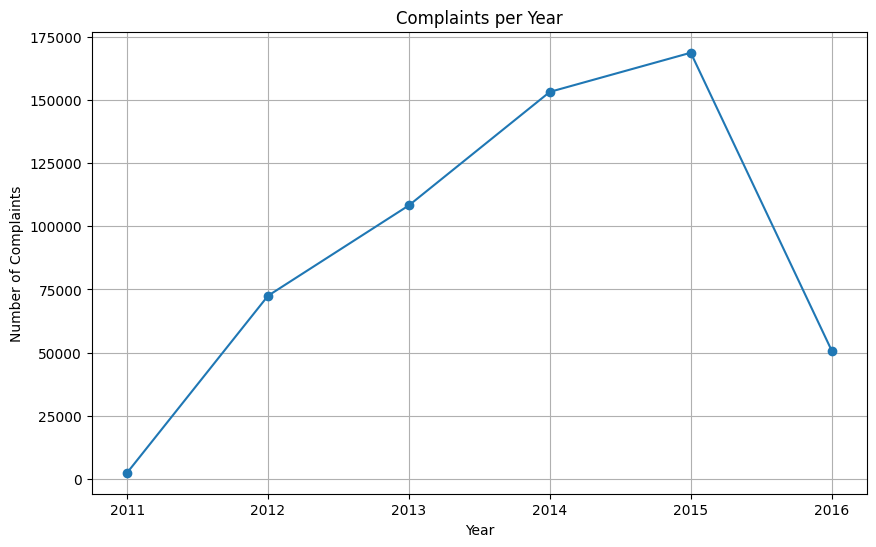

In [176]:
# Identify the number of complaints by year
# Extract year and count complaints per year
yearly_complaints = df1.groupby(df1['Date_Received'].dt.year).size().reset_index(name='Issue')

# Line chart by year
plt.figure(figsize=(10,6))
plt.plot(yearly_complaints['Date_Received'], yearly_complaints['Issue'], marker='o', linestyle='-')
plt.title('Complaints per Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(yearly_complaints['Date_Received'])  # Show every year
plt.grid(True)
plt.show()

2011 received the least issues whilst 2015 received the most number of issues. Issues sharply declined in 2016

In [179]:
# Identify columns where the column name is numeric
numeric_cols = [col for col in df1.columns if str(col).isdigit()]

# Find numeric columns where all values match the column header
cols_to_drop = [col for col in numeric_cols if (df1[col] == int(col)).all()]

# Drop them
df1 = df1.drop(columns=cols_to_drop)

df1

,Date_Received,Product,Sub_Product,Issue,Company,State,Zipcode,Submitted_Via,Date_Sent_To_Company,Company_Response_To_Consumer,Timely_Response,Consumer_Disputed?,Complaint_Id,-1,time_response
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,2013-09-03,Closed with explanation,Yes,Yes,511074,-1,4
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,2013-09-03,Closed with explanation,Yes,Yes,511080,-1,4
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,2013-09-18,Closed with explanation,Yes,No,510473,-1,19
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,2013-08-30,Closed with explanation,Yes,Yes,510326,-1,0
4,2013-08-30,Debt collection,Credit card,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,2013-08-30,Closed with explanation,Yes,Yes,511067,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Bank of America,NaN,NaN,Referral,2014-07-07,Closed with explanation,Yes,No,919529,-1,6
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Residential Credit Solutions,NaN,NaN,Referral,2014-07-23,Closed with explanation,No,No,918447,-1,22
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",BB&T Financial,NaN,NaN,Phone,2013-11-18,Closed with explanation,Yes,No,114550,-1,496
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Global Recovery Group,NaN,NaN,Phone,2015-04-14,Untimely response,No,No,1329963,-1,0


5. Which companies resolve complaints satisfactorily on a consistent basis, and which struggle?


In [182]:
df1['Company_Response_To_Consumer'].value_counts()

Company_Response_To_Consumer
Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: count, dtype: int64

In [187]:
cust_sats=df1.groupby('Company')['Company_Response_To_Consumer'].value_counts()
cust_sats.sort_values(ascending=False).head(50)

Company                                 Company_Response_To_Consumer   
Bank of America                         Closed with explanation            37212
Wells Fargo & Company                   Closed with explanation            32809
JPMorgan Chase & Co.                    Closed with explanation            25722
Equifax                                 Closed with explanation            23877
TransUnion Intermediate Holdings, Inc.  Closed with explanation            18805
Ocwen                                   Closed with explanation            18245
Experian                                Closed with explanation            16899
Citibank                                Closed with explanation            15700
Experian                                Closed with non-monetary relief    12776
Nationstar Mortgage                     Closed with explanation            12466
Capital One                             Closed with explanation            10068
Ditech Financial LLC                 

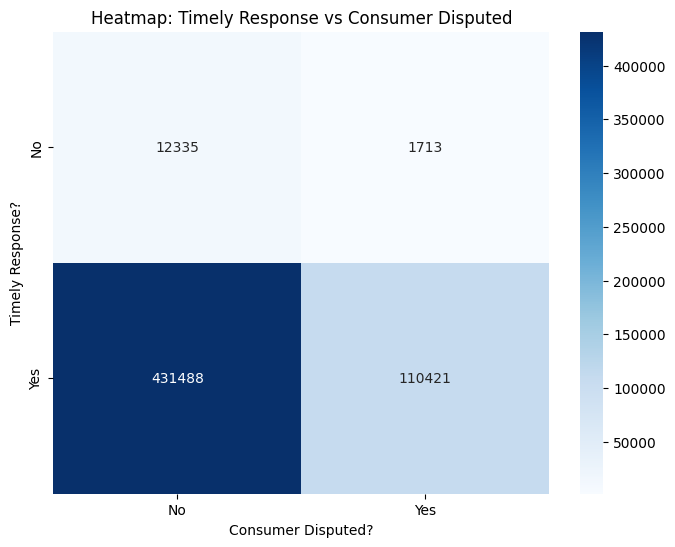

In [188]:
# Cross-tab between Timely Response and Consumer Disputed
ct = pd.crosstab(df1['Timely_Response'], df1['Consumer_Disputed?'])

plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Timely Response vs Consumer Disputed')
plt.xlabel('Consumer Disputed?')
plt.ylabel('Timely Response?')
plt.show()

A lot of consumers have their issues timely resolved, but are not happy with the resolution!

In [ ]:
# Determine which company responds to complaints consistently
# Cross-tab between company, timely response, and dispute outcome
company_ct = pd.crosstab(df1['Company'],[df1['Timely_Response'], df1['Consumer_Disputed?']])

plt.figure(figsize=(10,5))
sns.heatmap(company_ct, annot=True, fmt='d', cmap='Oranges')
plt.title('Company Performance: Timely Response vs Consumer Disputes')
plt.ylabel('Company')
plt.xlabel('Timely Response / Disputed')
plt.show()


In [ ]:
Can patterns in the complaints provide insights into systemic issues in the financial sector?